<a href="https://colab.research.google.com/github/RenanNB360/Treino-de-Machine-Learning-Python/blob/master/Recursos_Humanos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Estudo de caso

Em uma determinada empresa precisamos analisar quais funcionários estão mais propensos a saírem. Nesta situação, a empresa terá a perca de um funcionário treinado e habilidoso para começar a contratação de um novo, onde será necessário seu treinamento e tempo de adaptação. Com isso a empresa terá grandes custos de alocação e treinamento deste novo associado, se tornando um processo muito dispendioso.

Pesquisas feitas em algumas empresas sobre o processo de contratação:

*   Contratar e reter funcionários são tarefas extremamente complexas que exige capital, tempo e habilidades. Sendo elas entrevistas com gestores e psicólogos além de aplicação de testes para validação dos conhecimentos necessários.

*   Pequenos empresários gastam em torno de 40% das horas de trabalho em tarefas que não geram receitas, como a contratação.

*   Empresas gastam de 15% a 20% do salário dos funcionários para recrutar um novo candidato.

*   Uma empresa média perde entre 1% e 2% de sua receita total no tempo que leva para treinar um novo funcionário.

*   A contratação de um novo funcionário custa em média $ 7645 (em uma empresa com aproximadamente 500 funcionários).

*   Demora mais ou menos 52 dias para um funcionário ocupar de fato sua nova posição.

Fonte : https://toggl.com/blog/costing-of-hiring-an-employee


Objetivos:

1.   Localizar quais os funcionários mais propensos a saírem do emprego.

2.   Dados a serem analisados:

  *   Envolvimento com o trabalho
  *   Escolaridade
  *   Satisfação com o trabalho
  *   Métricas de desempenho
  *   Relacionamento
  *   Equilíbrio entre atividades 
      pessoais e profissionais







Base de dados: https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset

# Importações

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf
import pickle

In [ ]:
employee_df = pd.read_csv('Human_Resources.csv')

In [ ]:
employee_df.shape

(1470, 35)

In [ ]:
employee_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
employee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
employee_df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


# Visualização dos Dados

In [ ]:
employee_df['Attrition'] = employee_df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)
employee_df['OverTime'] = employee_df['OverTime'].apply(lambda x: 1 if x == 'Yes' else 0)

In [ ]:
employee_df[['Attrition', 'OverTime']].head()

,Attrition,OverTime
0,1,1
1,0,0
2,1,1
3,0,1
4,0,0


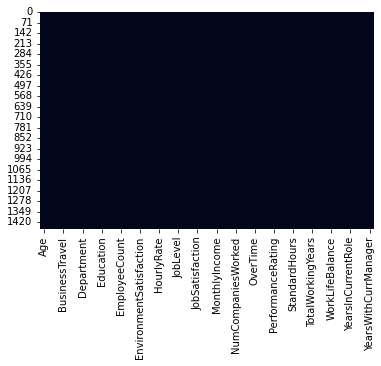

In [ ]:
sns.heatmap(employee_df.isna(), cbar=False);

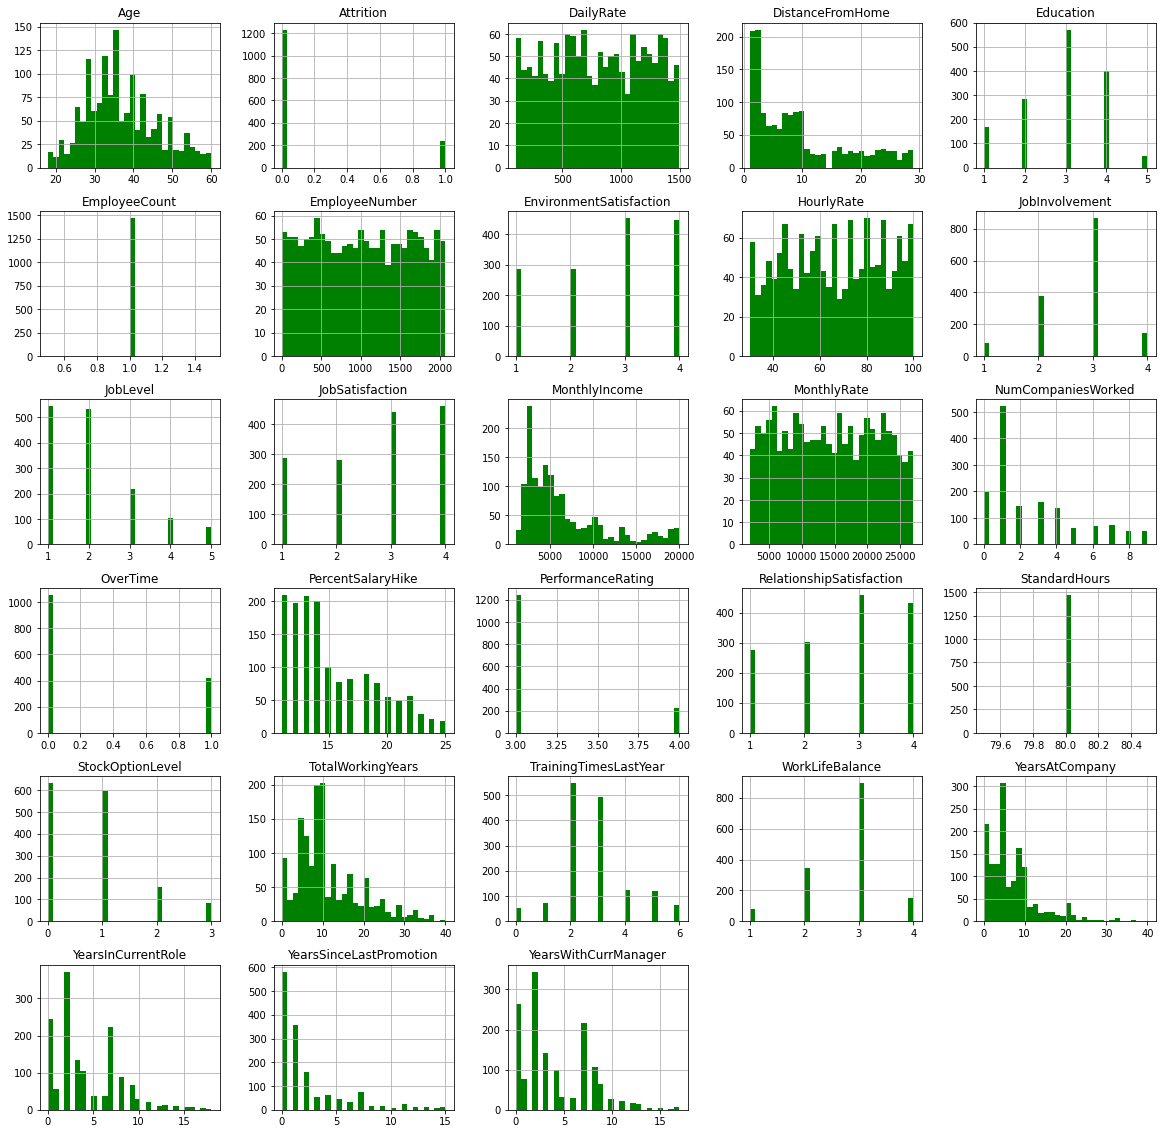

In [ ]:
employee_df.hist(bins = 30, figsize=(20,20), color = 'g');

In [ ]:
employee_df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [ ]:
employee_df.drop(['EmployeeCount', 'StandardHours', 'Over18', 'EmployeeNumber'], axis = 1, inplace=True)

In [ ]:
employee_df.shape

(1470, 31)

In [ ]:
left_df = employee_df[employee_df['Attrition'] == 1]
stayed_df = employee_df[employee_df['Attrition'] == 0]

In [ ]:
print(f'Total: {len(employee_df)}')
print(f'Numero de funcionários que saíram da empresa: {len(left_df)}')
print(f'Porcentagem de funcionários que saíram da empresa: {round((len(left_df) / len(employee_df)) * 100, 2)}%')
print(f'Numero de funcionários que ficaram da empresa: {len(stayed_df)}')
print(f'Porcentagem de funcionários que ficaram da empresa: {round((len(stayed_df) / len(employee_df)) * 100, 2)}%')

Total: 1470
Numero de funcionários que saíram da empresa: 237
Porcentagem de funcionários que saíram da empresa: 16.12%
Numero de funcionários que ficaram da empresa: 1233
Porcentagem de funcionários que ficaram da empresa: 83.88%


In [ ]:
left_df.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,237.000000,237.0,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,...,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,33.607595,1.0,750.362869,10.632911,2.839662,2.464135,65.573840,2.518987,1.637131,2.468354,...,3.156118,2.599156,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321
std,9.689350,0.0,401.899519,8.452525,1.008244,1.169791,20.099958,0.773405,0.940594,1.118058,...,0.363735,1.125437,0.856361,7.169204,1.254784,0.816453,5.949984,3.174827,3.153077,3.143349
min,18.000000,1.0,103.000000,1.000000,1.000000,1.000000,31.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,1.0,408.000000,3.000000,2.000000,1.000000,50.000000,2.000000,1.000000,1.000000,...,3.000000,2.000000,0.000000,3.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,32.000000,1.0,699.000000,9.000000,3.000000,3.000000,66.000000,3.000000,1.000000,3.000000,...,3.000000,3.000000,0.000000,7.000000,2.000000,3.000000,3.000000,2.000000,1.000000,2.000000
75%,39.000000,1.0,1092.000000,17.000000,4.000000,4.000000,84.000000,3.000000,2.000000,3.000000,...,3.000000,4.000000,1.000000,10.000000,3.000000,3.000000,7.000000,4.000000,2.000000,5.000000
max,58.000000,1.0,1496.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,15.000000,15.000000,14.000000


In [ ]:
stayed_df.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1233.000000,1233.0,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,...,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000
mean,37.561233,0.0,812.504461,8.915653,2.927007,2.771290,65.952149,2.770479,2.145985,2.778589,...,3.153285,2.733982,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
std,8.888360,0.0,403.208379,8.012633,1.027002,1.071132,20.380754,0.692050,1.117933,1.093277,...,0.360408,1.071603,0.841985,7.760719,1.293585,0.681907,6.096298,3.649402,3.234762,3.594116
min,18.000000,0.0,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,0.0,477.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.0,817.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,6.000000,3.000000,1.000000,3.000000
75%,43.000000,0.0,1176.000000,13.000000,4.000000,4.000000,83.000000,3.000000,3.000000,4.000000,...,3.000000,4.000000,1.000000,16.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,60.000000,0.0,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,38.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


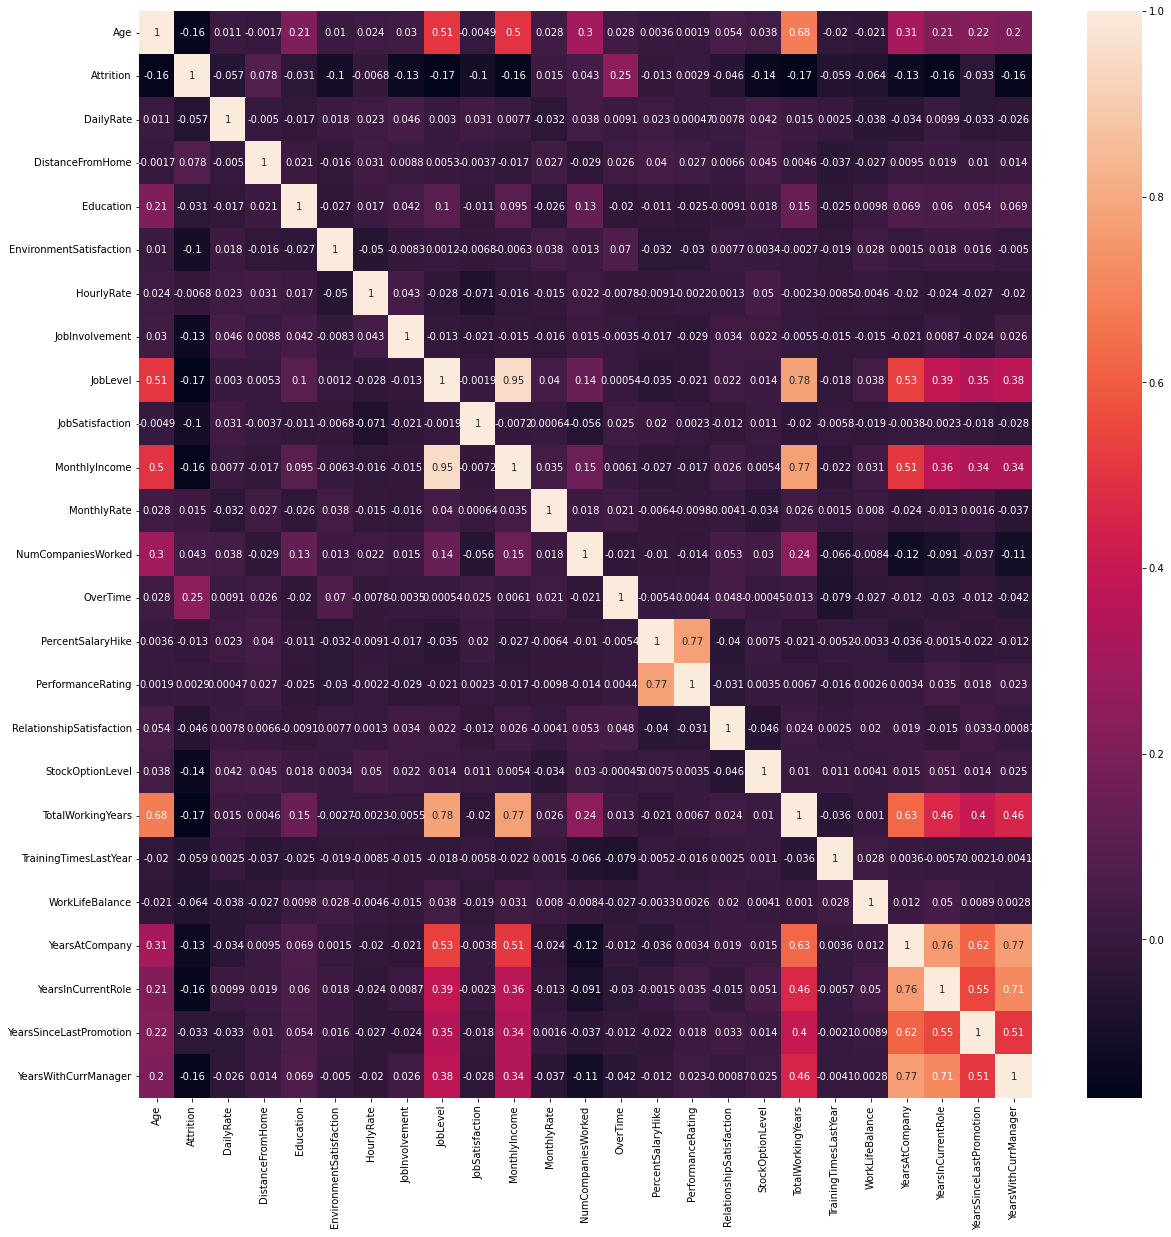

In [ ]:
correlations = employee_df.corr()
f, ax = plt.subplots(figsize = (20,20))
sns.heatmap(correlations, annot = True);

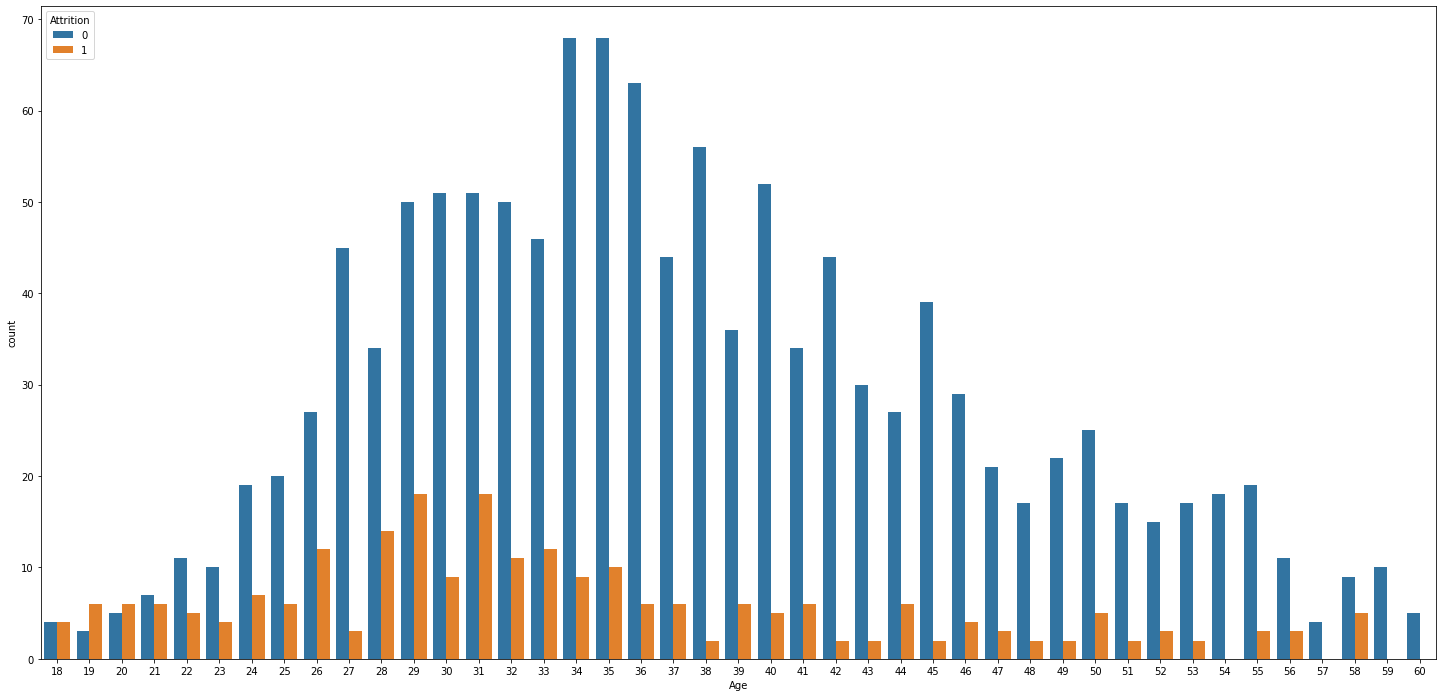

In [ ]:
plt.figure(figsize=[25,12])
sns.countplot(x = 'Age', hue = 'Attrition',data=employee_df);

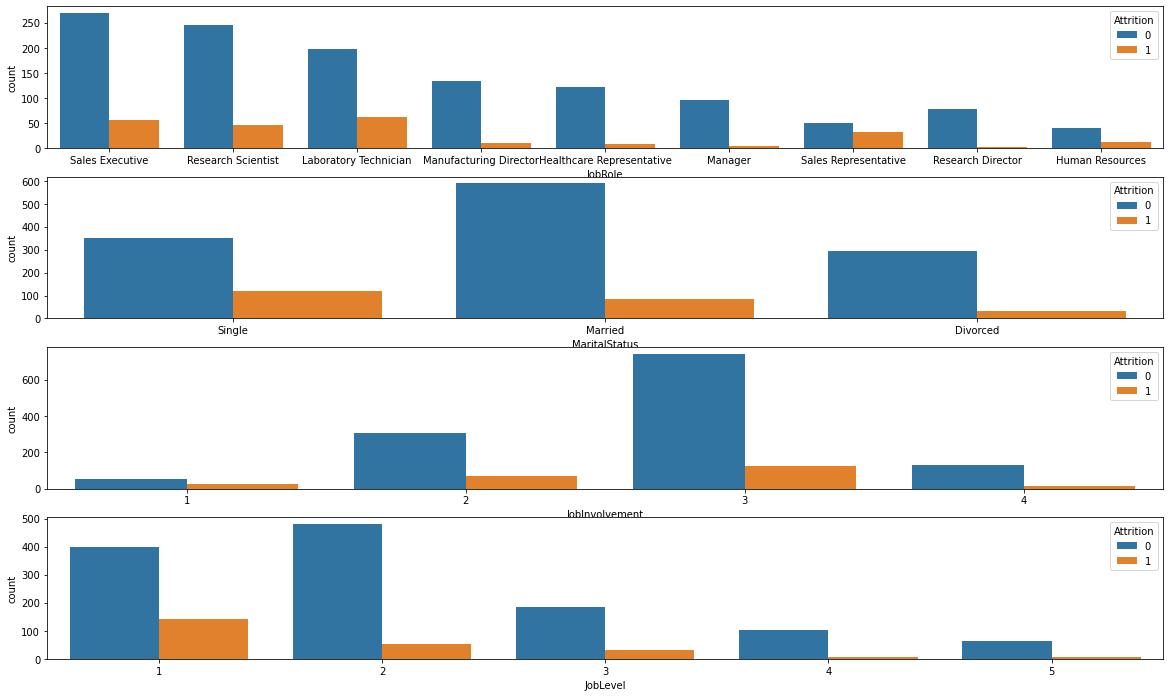

In [ ]:
plt.figure(figsize=[20,12])
plt.subplot(411)
sns.countplot(x = 'JobRole', hue = 'Attrition', data = employee_df)
plt.subplot(412)
sns.countplot(x = 'MaritalStatus', hue = 'Attrition', data = employee_df)
plt.subplot(413)
sns.countplot(x = 'JobInvolvement', hue = 'Attrition', data = employee_df)
plt.subplot(414)
sns.countplot(x = 'JobLevel', hue = 'Attrition', data = employee_df);

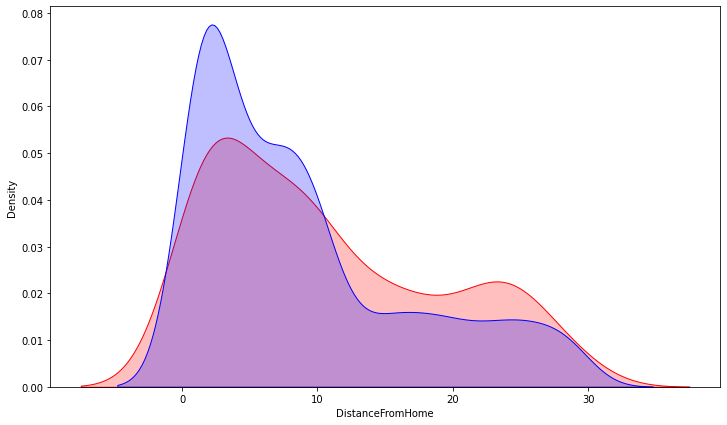

In [ ]:
plt.figure(figsize=[12,7])
sns.kdeplot(left_df['DistanceFromHome'], label = 'Funcionários que saíram da empresa', shade = True, color = 'r')
sns.kdeplot(stayed_df['DistanceFromHome'], label = 'Funcionários que não saíram da empresa', shade = True, color = 'b');

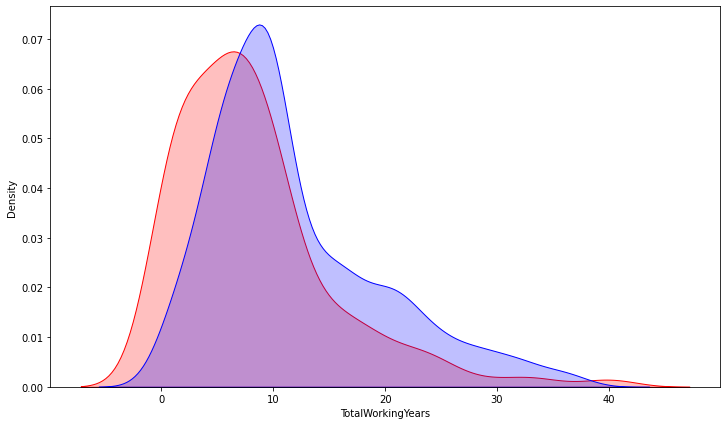

In [ ]:
plt.figure(figsize=[12,7])
sns.kdeplot(left_df['TotalWorkingYears'], label = 'Funcionários que saíram da empresa', shade = True, color = 'r')
sns.kdeplot(stayed_df['TotalWorkingYears'], label = 'Funcionários que não saíram da empresa', shade = True, color = 'b');

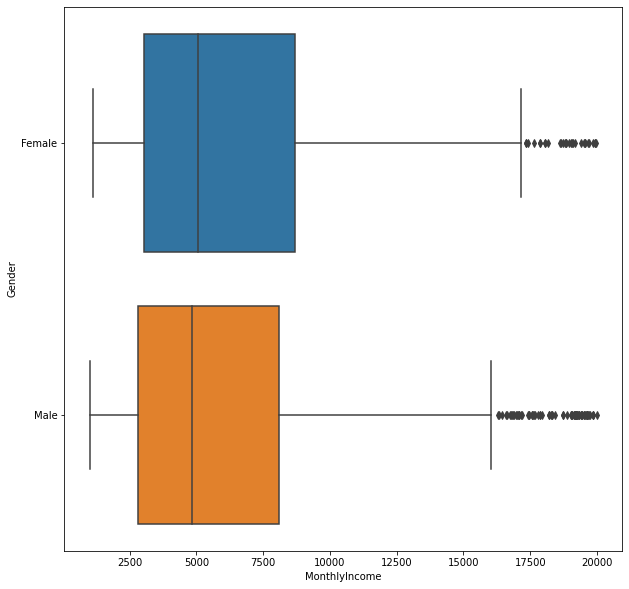

In [ ]:
plt.figure(figsize=[10,10])
sns.boxplot(x = 'MonthlyIncome', y = 'Gender', data = employee_df);

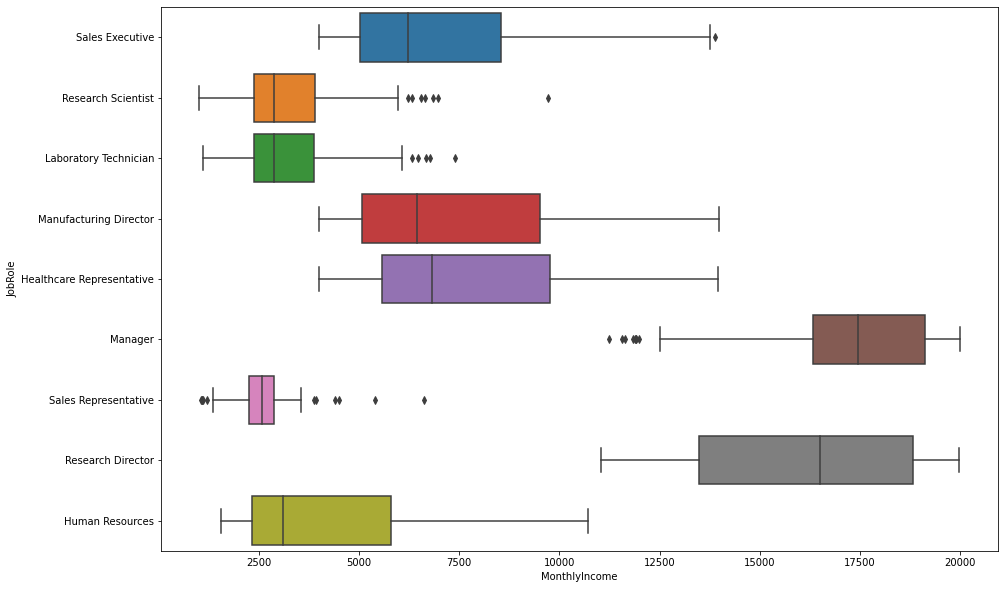

In [ ]:
plt.figure(figsize=[15,10])
sns.boxplot(x = 'MonthlyIncome', y = 'JobRole', data = employee_df);

# Pré-processamento dos Dados e Treinamento

In [ ]:
employee_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [ ]:
employee_df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [ ]:
x_category = employee_df[['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus']]
x_category

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married
...,...,...,...,...,...,...
1465,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married
1466,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married
1467,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married
1468,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married


In [ ]:
onehotencoder = OneHotEncoder()
x_category = onehotencoder.fit_transform(x_category).toarray()

In [ ]:
x_category.shape

(1470, 26)

In [ ]:
type(x_category)

numpy.ndarray

In [ ]:
x_category = pd.DataFrame(x_category)
type(x_category)

pandas.core.frame.DataFrame

In [ ]:
employee_df['BusinessTravel'].unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

In [ ]:
x_category

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1466,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1467,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1468,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [ ]:
x_numeric = employee_df[['Age', 'DailyRate',
       'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobSatisfaction',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager']]
x_numeric

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,2,94,3,2,4,5993,...,3,1,0,8,0,1,6,4,0,5
1,49,279,8,1,3,61,2,2,2,5130,...,4,4,1,10,3,3,10,7,1,7
2,37,1373,2,2,4,92,2,1,3,2090,...,3,2,0,7,3,3,0,0,0,0
3,33,1392,3,4,4,56,3,1,3,2909,...,3,3,0,8,3,3,8,7,3,0
4,27,591,2,1,1,40,3,1,2,3468,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,3,41,4,2,4,2571,...,3,3,1,17,3,3,5,2,0,3
1466,39,613,6,1,4,42,2,3,1,9991,...,3,1,1,9,5,3,7,7,1,7
1467,27,155,4,3,2,87,4,2,2,6142,...,4,2,1,6,0,3,6,2,0,3
1468,49,1023,2,3,4,63,2,2,2,5390,...,3,4,0,17,3,2,9,6,0,8


In [ ]:
x_all = pd.concat([x_category, x_numeric], axis = 1)
x_all

,0,1,2,3,4,5,6,7,8,9,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,3,1,0,8,0,1,6,4,0,5
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,4,4,1,10,3,3,10,7,1,7
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,3,2,0,7,3,3,0,0,0,0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,3,3,0,8,3,3,8,7,3,0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,3,3,1,17,3,3,5,2,0,3
1466,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,3,1,1,9,5,3,7,7,1,7
1467,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,4,2,1,6,0,3,6,2,0,3
1468,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,3,4,0,17,3,2,9,6,0,8


In [ ]:
scaler = MinMaxScaler()
x = scaler.fit_transform(x_all)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [ ]:
x

array([[0.        , 0.        , 1.        , ..., 0.22222222, 0.        ,
        0.29411765],
       [0.        , 1.        , 0.        , ..., 0.38888889, 0.06666667,
        0.41176471],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 1.        , ..., 0.11111111, 0.        ,
        0.17647059],
       [0.        , 1.        , 0.        , ..., 0.33333333, 0.        ,
        0.47058824],
       [0.        , 0.        , 1.        , ..., 0.16666667, 0.06666667,
        0.11764706]])

In [ ]:
y = employee_df['Attrition']
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1102, 50), (368, 50), (1102,), (368,))

# Regressão Logística

In [ ]:
logistic = LogisticRegression()
logistic.fit(x_train, y_train)

LogisticRegression()

In [ ]:
y_pred = logistic.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,

In [ ]:
y_test

1454    0
653     0
954     0
604     0
521     0
       ..
91      0
639     0
1018    0
1407    0
478     0
Name: Attrition, Length: 368, dtype: int64

In [ ]:
accuracy_score(y_test, y_pred)

0.8777173913043478

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[304,  10],
       [ 35,  19]])

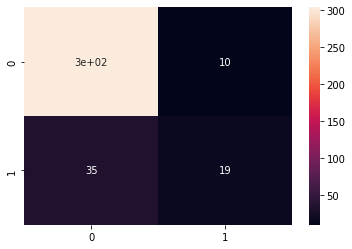

In [ ]:
sns.heatmap(cm, annot=True);

In [ ]:
#Precision
19 / (19 + 10)

0.6551724137931034

In [ ]:
# Recall
19 / (19 + 35)

0.35185185185185186

In [ ]:
precision_score(y_test, y_pred)

0.6551724137931034

In [ ]:
recall_score(y_test, y_pred)

0.35185185185185186

In [ ]:
f1_score(y_test, y_pred, average='macro')

0.6944593073672946

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93       314
           1       0.66      0.35      0.46        54

    accuracy                           0.88       368
   macro avg       0.78      0.66      0.69       368
weighted avg       0.86      0.88      0.86       368



# Random Forest

In [ ]:
forest = RandomForestClassifier()
forest.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred = forest.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,

In [ ]:
accuracy_score(y_test, y_pred)

0.8777173913043478

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[314,   0],
       [ 45,   9]])

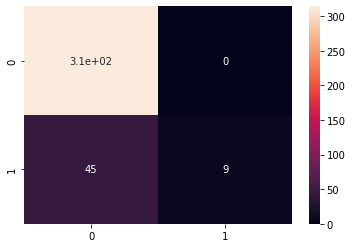

In [ ]:
sns.heatmap(cm, annot=True);

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       314
           1       1.00      0.17      0.29        54

    accuracy                           0.88       368
   macro avg       0.94      0.58      0.61       368
weighted avg       0.89      0.88      0.84       368



# Redes Neurais Artificiais

In [ ]:
x_train.shape

(1102, 50)

In [ ]:
(50 + 1) / 2

25.5

In [ ]:
neural = tf.keras.models.Sequential()
neural.add(tf.keras.layers.Dense(units = 25, activation='relu', input_shape=(50,)))
neural.add(tf.keras.layers.Dense(units = 25, activation='relu'))
neural.add(tf.keras.layers.Dense(units = 25, activation='relu'))
neural.add(tf.keras.layers.Dense(units = 1, activation='sigmoid'))

In [ ]:
neural.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 25)                1275      
                                                                 
 dense_1 (Dense)             (None, 25)                650       
                                                                 
 dense_2 (Dense)             (None, 25)                650       
                                                                 
 dense_3 (Dense)             (None, 1)                 26        
                                                                 
Total params: 2,601
Trainable params: 2,601
Non-trainable params: 0
_________________________________________________________________


In [ ]:
neural.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
neural.fit(x_train, y_train, epochs=200)

Epoch 1/200
35/35 [==============================] - 1s 3ms/step - loss: 0.5035 - accuracy: 0.8321
Epoch 2/200
35/35 [==============================] - 0s 2ms/step - loss: 0.4141 - accuracy: 0.8339
Epoch 3/200
35/35 [==============================] - 0s 2ms/step - loss: 0.3936 - accuracy: 0.8339
Epoch 4/200
35/35 [==============================] - 0s 2ms/step - loss: 0.3716 - accuracy: 0.8339
Epoch 5/200
35/35 [==============================] - 0s 3ms/step - loss: 0.3522 - accuracy: 0.8512
Epoch 6/200
35/35 [==============================] - 0s 2ms/step - loss: 0.3358 - accuracy: 0.8702
Epoch 7/200
35/35 [==============================] - 0s 2ms/step - loss: 0.3179 - accuracy: 0.8838
Epoch 8/200
35/35 [==============================] - 0s 2ms/step - loss: 0.3047 - accuracy: 0.8848
Epoch 9/200
35/35 [==============================] - 0s 2ms/step - loss: 0.2939 - accuracy: 0.8875
Epoch 10/200
35/35 [==============================] - 0s 2ms/step - loss: 0.2851 - accuracy: 0.8966
Epoch 11/

In [ ]:
y_pred = neural.predict(x_test)
y_pred

array([[1.22597510e-09],
       [4.17026656e-12],
       [7.02904108e-15],
       [1.45659316e-08],
       [2.37487981e-14],
       [2.80501544e-02],
       [1.16403550e-01],
       [1.00000000e+00],
       [9.39811076e-12],
       [4.43577766e-04],
       [2.37016629e-09],
       [2.86258638e-11],
       [2.07232703e-11],
       [3.87267779e-12],
       [2.48294603e-13],
       [4.37515421e-13],
       [7.65124561e-11],
       [1.99273666e-14],
       [7.05843413e-12],
       [4.63192787e-17],
       [9.99997973e-01],
       [7.15621824e-18],
       [3.32756791e-08],
       [9.97131632e-16],
       [3.24343925e-14],
       [8.09082142e-12],
       [4.37334180e-03],
       [2.61085798e-22],
       [6.74531334e-11],
       [3.51129499e-12],
       [7.69712852e-12],
       [4.51221492e-19],
       [5.87132005e-17],
       [8.99467306e-11],
       [3.74686994e-19],
       [9.99999702e-01],
       [5.55963599e-18],
       [5.59799374e-15],
       [1.68858053e-10],
       [3.05806913e-09],


In [ ]:
y_pred = (y_pred >= 0.5)
y_pred

array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[287,  27],
       [ 31,  23]])

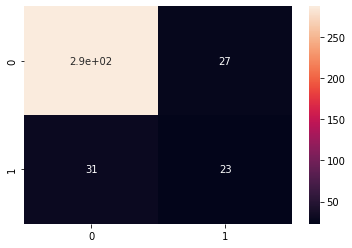

In [ ]:
sns.heatmap(cm, annot=True);

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.91      0.91       314
           1       0.46      0.43      0.44        54

    accuracy                           0.84       368
   macro avg       0.68      0.67      0.68       368
weighted avg       0.84      0.84      0.84       368



# Salvando o classificador

In [ ]:
with open('variaveis_modelo.pkl', 'wb') as f:
  pickle.dump([scaler, onehotencoder, logistic], f)

Abrir variavel de produção

In [ ]:
with open('variaveis_modelo.pkl', 'rb') as f:
  min_max, encoder, model = pickle.load(f)

In [ ]:
min_max, encoder, model

(MinMaxScaler(), OneHotEncoder(), LogisticRegression())

In [ ]:
x_novo = employee_df.iloc[0:1]
x_novo

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
